In [11]:
%load_ext autoreload
%autoreload 2
%pylab
%matplotlib inline

import pandas as pd

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [12]:
import sys
sys.path.append("../sv_system/")

In [ ]:
import torch
from system.sv_test import sv_test  

sv_embeds = np.load("../sv_system/voices_fbank64_embeds/sv_embeds.npy") 
sv_embeds = torch.from_numpy(sv_embeds) 

trial = pd.read_csv("../sv_system/datasets/voices/sv_trial.csv")
eer, thres, scores = sv_test(sv_embeds, trial)
trial = trial.assign(score=scores.numpy())

label
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: score, dtype: object

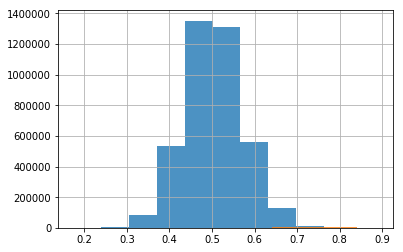

In [109]:
trial.groupby('label').score.hist(alpha=0.8)

In [86]:
fp_trials = trial[(trial.score > thres) & (trial.label == 0)] 
fn_trials = trial[(trial.score < thres) & (trial.label == 1)]

In [93]:
def get_info(id_str, q_key):
    keys = ["room", "noise", "spk_id", "ch_id", "sg_id", "mc_id", "mc_t", "mc_l", "mc_deg"]
    if q_key not in keys:
        print("valid key:{}".format(keys))
        raise KeyError
    id_splits = id_str.split('-')
    info = {}
    for i, key in enumerate(keys):
        info[key] = id_splits[i+3] # first three are useless
    
    return info[q_key]

In [118]:
for key in ['ch_id', 'sg_id', 'noise', 'mc_id', 'mc_l', 'mc_deg']:
    fn_trials['comp_'+key] = fn_trials.apply(lambda x: (get_info(x.enroll_id, key), get_info(x.test_id, key)), axis=1)

/opt/conda/envs/pytorch-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [120]:
fn_trials.sort_values('score').head(20)

,enroll_id,test_id,label,enroll_idx,test_idx,score,comp_ch_id,comp_sg_id,comp_mc_id,comp_mc_t,comp_mc_l,comp_mc_deg,comp_noise
3473375,Lab41-SRI-VOiCES-rm1-none-sp5154-ch006174-sg00...,Lab41-SRI-VOiCES-rm2-tele-sp5154-ch026559-sg00...,1,221,15423,0.393738,"(ch006174, ch026559)","(sg0028, sg0003)","(mc01, mc12)","(stu, lav)","(clo, wal)","(dg100, dg090)","(none, tele)"
3489023,Lab41-SRI-VOiCES-rm1-none-sp5154-ch006174-sg00...,Lab41-SRI-VOiCES-rm2-tele-sp5154-ch026559-sg00...,1,222,15423,0.433945,"(ch006174, ch026559)","(sg0028, sg0003)","(mc03, mc12)","(stu, lav)","(mid, wal)","(dg100, dg090)","(none, tele)"
2521839,Lab41-SRI-VOiCES-rm1-none-sp0948-ch132705-sg00...,Lab41-SRI-VOiCES-rm2-musi-sp0948-ch132707-sg00...,1,161,2767,0.448639,"(ch132705, ch132707)","(sg0009, sg0017)","(mc03, mc09)","(stu, lav)","(mid, tbo)","(dg090, dg120)","(none, musi)"
3708209,Lab41-SRI-VOiCES-rm1-none-sp4967-ch003586-sg00...,Lab41-SRI-VOiCES-rm2-tele-sp4967-ch028868-sg00...,1,236,15537,0.452729,"(ch003586, ch028868)","(sg0000, sg0004)","(mc01, mc12)","(stu, lav)","(clo, wal)","(dg100, dg000)","(none, tele)"
2506175,Lab41-SRI-VOiCES-rm1-none-sp0948-ch132705-sg00...,Lab41-SRI-VOiCES-rm2-musi-sp0948-ch132710-sg00...,1,160,2751,0.454431,"(ch132705, ch132710)","(sg0009, sg0024)","(mc01, mc12)","(stu, lav)","(clo, wal)","(dg090, dg000)","(none, musi)"
3676913,Lab41-SRI-VOiCES-rm1-none-sp4967-ch003586-sg00...,Lab41-SRI-VOiCES-rm2-tele-sp4967-ch028868-sg00...,1,234,15537,0.454817,"(ch003586, ch028868)","(sg0012, sg0004)","(mc01, mc12)","(stu, lav)","(clo, wal)","(dg080, dg000)","(none, tele)"
2506191,Lab41-SRI-VOiCES-rm1-none-sp0948-ch132705-sg00...,Lab41-SRI-VOiCES-rm2-musi-sp0948-ch132707-sg00...,1,160,2767,0.455550,"(ch132705, ch132707)","(sg0009, sg0017)","(mc01, mc09)","(stu, lav)","(clo, tbo)","(dg090, dg120)","(none, musi)"
2521836,Lab41-SRI-VOiCES-rm1-none-sp0948-ch132705-sg00...,Lab41-SRI-VOiCES-rm2-musi-sp0948-ch132707-sg00...,1,161,2764,0.457971,"(ch132705, ch132707)","(sg0009, sg0017)","(mc03, mc12)","(stu, lav)","(mid, wal)","(dg090, dg120)","(none, musi)"
3457727,Lab41-SRI-VOiCES-rm1-none-sp5154-ch006174-sg00...,Lab41-SRI-VOiCES-rm2-tele-sp5154-ch026559-sg00...,1,220,15423,0.459040,"(ch006174, ch026559)","(sg0019, sg0003)","(mc01, mc12)","(stu, lav)","(clo, wal)","(dg100, dg090)","(none, tele)"
3461640,Lab41-SRI-VOiCES-rm1-none-sp5154-ch006174-sg00...,Lab41-SRI-VOiCES-rm2-musi-sp5154-ch026559-sg00...,1,221,3688,0.461317,"(ch006174, ch026559)","(sg0028, sg0003)","(mc01, mc04)","(stu, lav)","(clo, mid)","(dg100, dg090)","(none, musi)"


In [110]:
fn_trials.comp_mc_l.value_counts()

(clo, wal)    144
(clo, ceo)    128
(mid, wal)    112
(clo, far)    104
(mid, ceo)     92
(clo, cec)     86
(clo, mid)     83
(clo, tbo)     60
(mid, far)     59
(mid, mid)     57
(mid, cec)     54
(clo, clo)     41
(mid, tbo)     36
(clo, beh)     29
(mid, clo)     28
(mid, beh)     24
Name: comp_mc_l, dtype: int64

In [111]:
fn_trials.comp_mc_id.value_counts()

(mc01, mc12)    144
(mc01, mc11)    128
(mc03, mc12)    112
(mc01, mc06)    104
(mc03, mc11)     92
(mc01, mc10)     86
(mc01, mc04)     83
(mc01, mc09)     60
(mc03, mc06)     59
(mc03, mc04)     57
(mc03, mc10)     54
(mc01, mc02)     41
(mc03, mc09)     36
(mc01, mc08)     29
(mc03, mc02)     28
(mc03, mc08)     24
Name: comp_mc_id, dtype: int64

In [112]:
fn_trials.comp_mc_deg.value_counts()

(dg080, dg060)    164
(dg080, dg000)    132
(dg100, dg180)    128
(dg100, dg090)    116
(dg090, dg000)     88
(dg100, dg000)     86
(dg080, dg180)     80
(dg080, dg090)     72
(dg090, dg180)     66
(dg090, dg120)     58
(dg100, dg120)     55
(dg100, dg060)     50
(dg080, dg120)     22
(dg090, dg090)     10
(dg090, dg060)     10
Name: comp_mc_deg, dtype: int64

In [104]:
for key in ['ch_id', 'sg_id', 'mc_id', 'mc_l', 'mc_deg']:
    fp_trials['comp_'+key] = fp_trials.apply(lambda x: (get_info(x.enroll_id, key), get_info(x.test_id, key)), axis=1)

/opt/conda/envs/pytorch-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [106]:
fp_trials.sort_values('score', ascending=False)[]

,enroll_id,test_id,label,enroll_idx,test_idx,score,comp_ch_id,comp_sg_id,comp_mc_id,comp_mc_t,comp_mc_l,comp_mc_deg
3055233,Lab41-SRI-VOiCES-rm1-none-sp3645-ch039840-sg00...,Lab41-SRI-VOiCES-rm2-musi-sp4064-ch077779-sg00...,0,195,4129,0.828523,"(ch039840, ch077779)","(sg0020, sg0032)","(mc03, mc08)","(stu, lav)","(mid, beh)","(dg100, dg090)"
3059148,Lab41-SRI-VOiCES-rm1-none-sp3645-ch039840-sg00...,Lab41-SRI-VOiCES-rm2-none-sp4064-ch077779-sg00...,0,195,8044,0.821941,"(ch039840, ch077779)","(sg0020, sg0032)","(mc03, mc08)","(stu, lav)","(mid, beh)","(dg100, dg090)"
3039585,Lab41-SRI-VOiCES-rm1-none-sp3645-ch039840-sg00...,Lab41-SRI-VOiCES-rm2-musi-sp4064-ch077779-sg00...,0,194,4129,0.819892,"(ch039840, ch077779)","(sg0020, sg0032)","(mc01, mc08)","(stu, lav)","(clo, beh)","(dg100, dg090)"
3043500,Lab41-SRI-VOiCES-rm1-none-sp3645-ch039840-sg00...,Lab41-SRI-VOiCES-rm2-none-sp4064-ch077779-sg00...,0,194,8044,0.818972,"(ch039840, ch077779)","(sg0020, sg0032)","(mc01, mc08)","(stu, lav)","(clo, beh)","(dg100, dg090)"
1822165,Lab41-SRI-VOiCES-rm1-none-sp0242-ch122625-sg00...,Lab41-SRI-VOiCES-rm2-none-sp5338-ch284437-sg00...,0,116,7253,0.814373,"(ch122625, ch284437)","(sg0004, sg0020)","(mc03, mc08)","(stu, lav)","(mid, beh)","(dg090, dg060)"
1234328,Lab41-SRI-VOiCES-rm1-none-sp8051-ch118101-sg00...,Lab41-SRI-VOiCES-rm2-tele-sp0032-ch021634-sg00...,0,78,14040,0.812267,"(ch118101, ch021634)","(sg0035, sg0006)","(mc01, mc08)","(stu, lav)","(clo, beh)","(dg090, dg000)"
1226515,Lab41-SRI-VOiCES-rm1-none-sp8051-ch118101-sg00...,Lab41-SRI-VOiCES-rm2-none-sp0032-ch021634-sg00...,0,78,6227,0.807820,"(ch118101, ch021634)","(sg0035, sg0006)","(mc01, mc08)","(stu, lav)","(clo, beh)","(dg090, dg000)"
3887614,Lab41-SRI-VOiCES-rm1-none-sp5401-ch039508-sg00...,Lab41-SRI-VOiCES-rm2-none-sp5126-ch036956-sg00...,0,248,7166,0.803584,"(ch039508, ch036956)","(sg0019, sg0011)","(mc01, mc02)","(stu, lav)","(clo, clo)","(dg100, dg090)"
3903262,Lab41-SRI-VOiCES-rm1-none-sp5401-ch039508-sg00...,Lab41-SRI-VOiCES-rm2-none-sp5126-ch036956-sg00...,0,249,7166,0.801172,"(ch039508, ch036956)","(sg0019, sg0011)","(mc03, mc02)","(stu, lav)","(mid, clo)","(dg100, dg090)"
3895421,Lab41-SRI-VOiCES-rm1-none-sp5401-ch039508-sg00...,Lab41-SRI-VOiCES-rm2-tele-sp5126-ch036956-sg00...,0,248,14973,0.798553,"(ch039508, ch036956)","(sg0019, sg0011)","(mc01, mc02)","(stu, lav)","(clo, clo)","(dg100, dg090)"


In [108]:
trial.head()

,enroll_id,test_id,label,enroll_idx,test_idx,score
0,Lab41-SRI-VOiCES-rm1-none-sp3446-ch144019-sg00...,Lab41-SRI-VOiCES-rm2-musi-sp3521-ch012715-sg00...,0,0,256,0.548658
1,Lab41-SRI-VOiCES-rm1-none-sp3446-ch144019-sg00...,Lab41-SRI-VOiCES-rm2-musi-sp3521-ch012715-sg00...,0,0,257,0.524447
2,Lab41-SRI-VOiCES-rm1-none-sp3446-ch144019-sg00...,Lab41-SRI-VOiCES-rm2-musi-sp3521-ch012715-sg00...,0,0,258,0.539626
3,Lab41-SRI-VOiCES-rm1-none-sp3446-ch144019-sg00...,Lab41-SRI-VOiCES-rm2-musi-sp3521-ch175962-sg00...,0,0,259,0.553446
4,Lab41-SRI-VOiCES-rm1-none-sp3446-ch144019-sg00...,Lab41-SRI-VOiCES-rm2-musi-sp3521-ch012715-sg00...,0,0,260,0.536685


### Unique configurations 

In [125]:
trial.enroll_id.apply(lambda x: get_info(x, 'noise')).unique()

array(['none'], dtype=object)

In [126]:
trial.test_id.apply(lambda x: get_info(x, 'noise')).unique()

array(['musi', 'none', 'babb', 'tele'], dtype=object)